<a href="https://colab.research.google.com/github/deepSuturn/matematica_computacional/blob/main/Matem%C3%A1tica_Computacional_Atividade_0_Jean_Rem%C3%A9dios%2C_202304940046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 0 - Uso do Jupyter, Git, Matplotlib e Transformações Lineares

### **Descrição da Tarefa:**

Implemente, utilizando uma ferramenta do tipo Jupyter (ex.: Jupyter Notebook, JupyterLab, Google Colab), um notebook que demonstre:

**Requisitos obrigatórios:**

- Uso de **ferramenta Jupyter-like** (Jupyter Notebook, Colab, etc.).
- Versionamento e entrega via **Git** (enviar o link do repositório).
- Trabalhos que não atendam a **todos** os requisitos acima **serão desconsiderados**.

1. **Rotação horária de 90°** e **shear (cisalhamento) em x**, diferentes dos exemplos apresentados em sala.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Contexto para rotação em 90º: Durante as aulas nós implementamos a Rotação horária de 90º, x[-1 0]+ y [0 1] em sentido anti-horário. Portanto, para diferenciar dos exemplos da aula, vou implementar em sentido horário em 90º utilizando a transformação x[0 -1] + y[1 0], e em 180º utiilizando da transformação x[-1 0] + y[0 -1].

In [94]:
#LEMBRETE PARA O AVALIADOR: ESTOU CONSIDERANDO OS EXEMPLOS DEMONSTRADOS EM SALA E NO VÍDEO Linear Transformations and Matrixes | Chapter 3, Essence of Linear Algebra, onde as bases
#unitárias são distríbuidas em colunas. Portanto, utilizo minha própria função para calcular as transformações.

#função para transformar no formato [[a c][b d]] * [x y]
def transformação_linear(V : np.array, T : np.array) -> np.array:
  # v transformado = x * [transformação em î] + y * [transformação em ĵ], sendo î e ĵ os vetores unitários então:
  return np.array( [ V[0] * T[0,0] + V[1] * T[0,1]
                   , V[0] * T[1,0] + V[1] * T[1,1]] )


In [95]:
#inicializar transformações.
T90 = np.array([[0, 1]
               ,[-1, 0]])
T180 = np.array([[-1, 0]
                ,[0, -1]])

#inicializar vetores não transformados para demonstração.
V1 = np.array([2, 0])
V2 = np.array([1, -2])

#aplicar transformação, V1 -> 90º e V2 -> 180º.
V1_t = transformação_linear(V1, T90)
V2_t = transformação_linear(V2, T180)

print("TRANSFORMAÇÃO EM 90º")
print("ORIGINAL: " + str(V1))
print("TRANSFORMADO: " + str(V1_t))

print("\nTRANSFORMAÇÃO EM 180º")
print("ORIGINAL: " + str(V2))
print("TRANSFORMADO: " + str(V2_t))

TRANSFORMAÇÃO EM 90º
ORIGINAL: [2 0]
TRANSFORMADO: [ 0 -2]

TRANSFORMAÇÃO EM 180º
ORIGINAL: [ 1 -2]
TRANSFORMADO: [-1  2]


Shear(cisalhamento) em x: para aplicar o shear em estaremos inclinando o espaço vetorial ao redor do eixo x, assim mantendo o eixo y sem inclinação, para isso o cálculo precisa alterar somente o eixo x assim, utilizaremos qualquer base que resulte em qualquer vetor da forma [x + ky (Angulado), y], e.g. x[1 0] + y[3, 1] ou x[1 0] + y[5, 1]

In [96]:
#inicializar exemplos de transformações shear em x
S1 = np.array([[1, 3]
              ,[0, 1]])
S2 = np.array([[1, 5]
              ,[0, 1]])

#inicializar vetores não transformados para demonstranção
V1 = np.array([0, 1])
V2 = np.array([2, 3])

#aplicar transformação, V1 -> S1, V2 -> S2
V1_t = transformação_linear(V1, S1)
V2_t = transformação_linear(V2, S2)

print("SHEAR 1 EM X")
print("ORIGINAL: " + str(V1))
print("TRANSFORMADO: " + str(V1_t))

print("SHEAR 2 EM X")
print("ORIGINAL: " + str(V2))
print("TRANSFORMADO: " + str(V2_t))

SHEAR 1 EM X
ORIGINAL: [0 1]
TRANSFORMADO: [3 1]
SHEAR 2 EM X
ORIGINAL: [2 3]
TRANSFORMADO: [17  3]


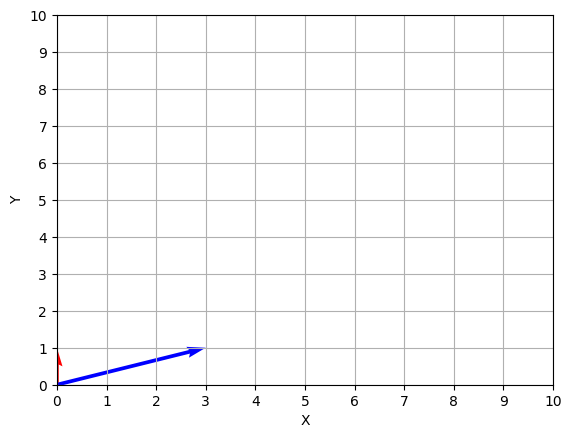

In [97]:
plt.quiver(0,0, V1[0],V1[1], angles="xy", scale_units="xy", scale=1, color="red")
plt.quiver(0,0, V1_t[0],V1_t[1], angles="xy", scale_units="xy", scale=1, color="blue")

plt.xlim([0,10])
plt.ylim([0,10])
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 11, 1))
plt.xlabel("X")
plt.ylabel("Y")

plt.grid()

plt.show()

2. A **obtenção das matrizes de transformação** a partir dos **vetores unitários (bases)** — mostrando o processo **numericamente** e **graficamente** com o **Matplotlib**.

Para demonstrar a obtenção de matrizes de transformação a partir dos vetores unitários (bases), primeiro vamos definir nosso vetores unitários como î = (1, 0) e ĵ = (0,1). Para encontrarmos a rotação em 90º em horário, podemos encontrar a obtenção das matrizes de transformação separando os componentes em uma matriz onde as colunas são os componentes dos vetores unitários começando por î até ĵ(em um exemplo 2D) onde elas deveriam estar caso fossem rotacionadas em 90º de forma horária. Para o caso da shear(cisalhamento) em x o processo é o mesmo porém não veremos alterações no vetor î, apenas no componente x do vetor î, para podermos angular o espaço vetorial ao redor de x.

In [ ]:
#Definir as bases
i_chapeu = np.array([1,0])
j_chapeu = np.array([0,1])

#definir as bases no eixo transformado
#SE Î FOSSE ROTACIONADO EM 90º DE FORMA HORÁRIA, ONDE ELE DEVERIA ESTAR?
#RS = SE ELE FOSSE ROTACIONADO ELE IRIA "ACORDAR" PARA O EIXO Y NEGATIVO, PORTANTO ESTARIA NO PONTO [0, -1]
i_chapeu_t_90 = np.array([0, -1])

#SE Ĵ FOSSE ROTACIONADO EM 90º DE FORMA HORÁRIA, ONDE ELE DEVERIA ESTAR?
#RS = SE ELE FOSSE ROTACIONADO ELE IRIA "DEITAR" PARA O EIXO X POSITIVO, PORTANTO ESTARIA NO PONTO [1, 0]
j_chapeu_t_90 = np.array([1, 0])

#SE Ĵ FOSSE ANGULADO PARA X UNIDADES PARA O EIXO X(SUPONHAMOS 3), ONDE ELE DEVERIA ESTAR?
#RS = SE ELE FOSSE ANGULADO PARA 3 UNIDADES A DIREITA, ELE IRIA ESTAR EM [3,1]
j_chapeu_t_shear = np.array([3, 1])

#Obter a matriz de transformação a partir desses novos vetores.
transformacao_90 = np.array([i_chapeu_t_90, j_chapeu_t_90]).T
transformacao_shear = np.array([i_chapeu, j_chapeu_t_shear]).T

print("TRANSFORMAÇÃO EM 90º HORÁRIO")
print(transformacao_90.T)
print("\nTRANSFORMAÇÃO SHEAR 3 UNIDADES A DIREITA")
print(transformacao_shear.T)

TRANSFORMAÇÃO EM 90º HORÁRIO
[[ 0  1]
 [-1  0]]

TRANSFORMAÇÃO SHEAR 3 UNIDADES A DIREITA
[[1 3]
 [0 1]]


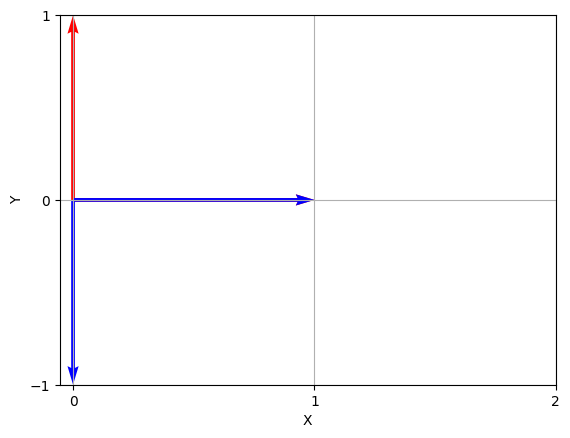

In [98]:
#MOSTRAR GRÁFICAMENTE OS RESULTADOS DE ROTAÇÃO HORÁRIA 90º:
#AVISO: AS LINHAS VÃO SE TRANSPOR PORTANTO UM VETOR PODE APARECER NA FRENTE DO OUTRO.
plt.quiver(0,0, i_chapeu[0], i_chapeu[1], angles="xy", scale_units="xy", scale=1, color="red")
plt.quiver(0,0, j_chapeu[0], j_chapeu[1], angles="xy", scale_units="xy", scale=1, color="red")
plt.quiver(0,0, i_chapeu_t_90[0], i_chapeu_t_90[1], angles="xy", scale_units="xy", scale=1, color="blue")
plt.quiver(0,0, j_chapeu_t_90[0], j_chapeu_t_90[1], angles="xy", scale_units="xy", scale=1, color="blue")

#RANGE DO GRÁFICO
plt.xticks(np.arange(0, 3, 1))
plt.yticks(np.arange(-1, 2, 1))
plt.xlabel("X")
plt.ylabel("Y")

plt.grid()

plt.show()

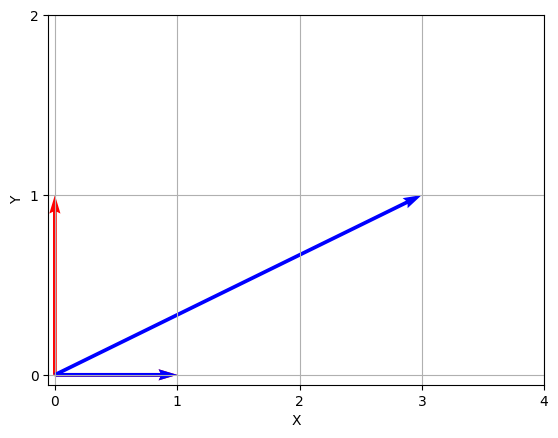

In [ ]:
#MOSTRAR GRÁFICAMENTE OS RESULTADOS DE SHEAR:
#AVISO: AS LINHAS VÃO SE TRANSPOR PORTANTO UM VETOR PODE APARECER NA FRENTE DO OUTRO.
plt.quiver(0,0, i_chapeu[0], i_chapeu[1], angles="xy", scale_units="xy", scale=1, color="red")
plt.quiver(0,0, j_chapeu[0], j_chapeu[1], angles="xy", scale_units="xy", scale=1, color="red")
plt.quiver(0,0, i_chapeu[0], i_chapeu[1], angles="xy", scale_units="xy", scale=1, color="blue")
plt.quiver(0,0, j_chapeu_t_shear[0], j_chapeu_t_shear[1], angles="xy", scale_units="xy", scale=1, color="blue")

#RANGE DO GRÁFICO
plt.xticks(np.arange(0, 5, 1))
plt.yticks(np.arange(0, 3, 1))
plt.xlabel("X")
plt.ylabel("Y")

plt.grid()

plt.show()

3. A **aplicação passo a passo** dessas matrizes a **dois vetores arbitrários**, com apresentação de resultados **numéricos** e **gráficos** no Matplotlib.


Para aplicar essas matrizes a dois vetores arbitrários, primeiramente devemos definir nossos dois vetores arbitrários, suponhamos que nossos vetores são [3,3] e [2,1]. Para aplicar a transformação de rotação em 90 graus horário, podemos considerar que a partir da questão anterior a transformação linear será a vx[0,-1] + vy[1, 0] portanto o cálculo do vetor resultante será a multiplicação do vetor pela matriz. e. g. Para o vetor [3,3] teremos  [3, -3] = 3[0, -1] + 3[1, 0]. Para aplicar a transformação de shear como fizemos na questão anterior, vamos multiplicar a matriz pelo vetor arbitrário -> vx[1,0] + vy[3, 1]. e. g. Para o vetor [3,3] teremos  [12, 3] = 3[1,0] + 3[3,1].

In [85]:
#Definir vetores arbitrárias
v1 = np.array([3,3])
v2 = np.array([2,1])

#Definir as transformações
T90 = np.array([[0, 1]
               ,[-1, 0]])
TSHEAR = np.array([[1, 3]
                  ,[0,1]])

#Aplicar a transformação 90 graus horário.
v1_t_90 = np.array( [ v1[0]* T90[0,0] + v1[1] * T90[0,1] , v1[0] * T90[1,0] + v1[1] * T90[1,1]] )
v2_t_90 = np.array( [ v2[0] * T90[0,0] + v2[1] * T90[0,1] , v2[0] * T90[1,0] + v2[1] * T90[1,1]] )

#Aplicar a transformação Shear 3 Coordenadas a Direita.
v1_t_shear = np.array( [ v1[0] * TSHEAR[0,0] + v1[1] * TSHEAR[0,1] , v1[0] * TSHEAR[1,0] + v1[1] * TSHEAR[1,1]] )
v2_t_shear = np.array( [ v2[0] * TSHEAR[0,0] + v2[1] * TSHEAR[0,1] , v2[0] * TSHEAR[1,0] + v2[1] * TSHEAR[1,1]] )

#MOSTRAR O RESULTADO
#LEMBRETE, COMO ESTAMOS UTILIZANDO AS DEMONSTRAÇÕES EM SALA AS MATRIZES SERÃO TRANSPOSTAS APENAS PARA VISUALIZAÇÃO.
print("TRANSFORMAÇÃO EM 90 GRAUS")
print("ORIGINAL: " + str(v1))
print("TRANSFORMADO: " + str(v1_t_90))
print("ORIGINAL: " + str(v2))
print("TRANSFORMADO: " + str(v2_t_90))


print("TRANSFORMAÇÃO SHEAR")
print("ORIGINAL: " + str(v1))
print("TRANSFORMADO: " + str(v1_t_shear))
print("ORIGINAL: " + str(v2))
print("TRANSFORMADO: " + str(v2_t_shear))

TRANSFORMAÇÃO EM 90 GRAUS
ORIGINAL: [3 3]
TRANSFORMADO: [ 3 -3]
ORIGINAL: [2 1]
TRANSFORMADO: [ 1 -2]
TRANSFORMAÇÃO SHEAR
ORIGINAL: [3 3]
TRANSFORMADO: [12  3]
ORIGINAL: [2 1]
TRANSFORMADO: [5 1]


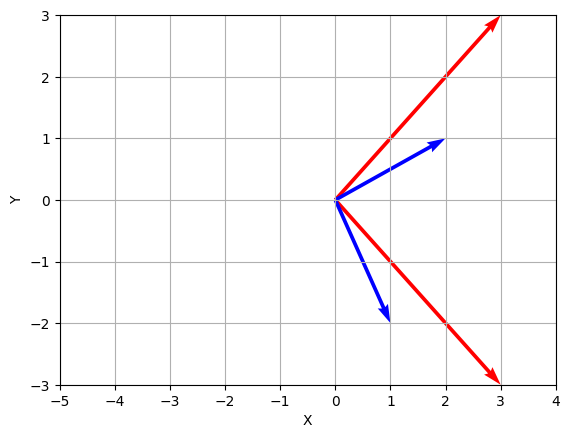

In [83]:

#MOSTRAR GRÁFICAMENTE OS RESULTADOS DA ROTAÇÃO:
plt.quiver(0,0, v1[0], v1[1], angles="xy", scale_units="xy", scale=1, color="red")
plt.quiver(0,0, v1_t_90[0], v1_t_90[1], angles="xy", scale_units="xy", scale=1, color="red")
plt.quiver(0,0, v2[0], v2[1], angles="xy", scale_units="xy", scale=1, color="blue")
plt.quiver(0,0, v2_t_90[0], v2_t_90[1], angles="xy", scale_units="xy", scale=1, color="blue")

#RANGE DO GRÁFICO
plt.xticks(np.arange(-5, 5, 1))
plt.yticks(np.arange(-3, 4, 1))
plt.xlabel("X")
plt.ylabel("Y")

plt.grid()

plt.show()

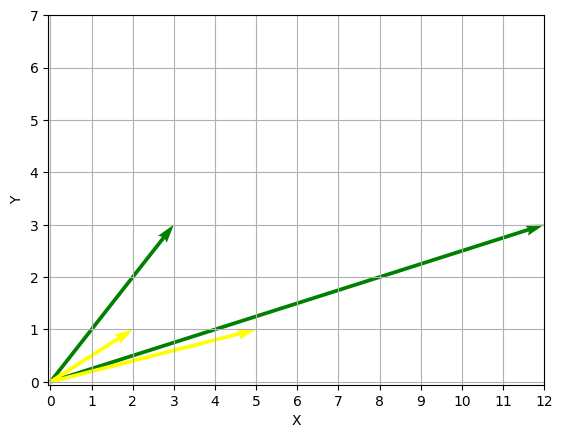

In [89]:

#MOSTRAR GRÁFICAMENTE OS RESULTADOS DA ROTAÇÃO:
plt.quiver(0,0, v1[0], v1[1], angles="xy", scale_units="xy", scale=1, color="green")
plt.quiver(0,0, v1_t_shear[0], v1_t_shear[1], angles="xy", scale_units="xy", scale=1, color="green")
plt.quiver(0,0, v2[0], v2[1], angles="xy", scale_units="xy", scale=1, color="yellow")
plt.quiver(0,0, v2_t_shear[0], v2_t_shear[1], angles="xy", scale_units="xy", scale=1, color="yellow")

#RANGE DO GRÁFICO
plt.xticks(np.arange(0, 13, 1))
plt.yticks(np.arange(0, 8, 1))
plt.xlabel("X")
plt.ylabel("Y")

plt.grid()

plt.show()